<a href="https://colab.research.google.com/github/PYFTS/NSFTS/blob/master/Forecasting_in_Non_stationary_Environments_with_FuzzyTime_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting in Non-stationary Environments with FuzzyTime Series

[MINDS - Machine Intelligence and Data Science Lab  ](http://www.minds.eng.ufmg.br/)

Petrônio C.  L. Silva   <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-1202-2552" href="https://orcid.org/0000-0002-1202-2552" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span>, Carlos A. Severiano Jr. <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-9100-9013" href="https://orcid.org/0000-0002-9100-9013" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span>, Marcos A. Alves <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0001-6934-6745" href="https://orcid.org/0000-0001-6934-6745" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span>,  Rodrigo Silva <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0003-2547-3835" href="https://orcid.org/0000-0003-2547-3835" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span>, Miri Weiss Cohen <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0001-5250-1016" href="https://orcid.org/0000-0001-5250-1016" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span>,  Frederico G. Guimarães <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0001-9238-8839" href="https://orcid.org/0000-0001-9238-8839" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span>

<center>
<table><tr><td> <a href="http://www.minds.eng.ufmg.br/"><img src="https://github.com/petroniocandido/pyFTS/raw/master/img/minds_logo_medium.jpeg" alt="MINDS - Machine Intelligence and Data Science Lab" width="100"/></a></td> 
  <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
<td><a href="http://bit.ly/pyFTSsite"><img src="https://github.com/petroniocandido/pyFTS/raw/master/img/logo_medium.png" alt="pyFTS - Fuzzy Time Series for Python" width="100"/></a></td>
</tr>
</table>
</center>


## Environment Setup

In [1]:
!pip3 install -U git+git://github.com/PYFTS/pyFTS.git@ad1205121deeb1ce555b634c4f73b1a50767c14f


  Cloning git://github.com/PYFTS/pyFTS.git (to revision ad1205121deeb1ce555b634c4f73b1a50767c14f) to /tmp/pip-req-build-shn0dpra
  Running command git clone -q git://github.com/PYFTS/pyFTS.git /tmp/pip-req-build-shn0dpra
  Running command git checkout -q ad1205121deeb1ce555b634c4f73b1a50767c14f
  Created wheel for pyFTS: filename=pyFTS-1.6-cp36-none-any.whl size=202424 sha256=48ddee3e17e80783eabed02848f8d233c78a05a8b6d1ddd61a3018e8ccd6b7e2
  Stored in directory: /tmp/pip-ephem-wheel-cache-hqd79sum/wheels/db/ce/03/17415590218858f322af86c13db67c30cf30c8ade0125c73f9
Successfully built pyFTS


## Common imports

In [0]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns


from pyFTS.common import Util

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Benchmark datasets

### Synthetic Concept Drifted Series

In [0]:
from pyFTS.data import artificial

mu_local = 5
sigma_local = 0.25
mu_drift = 3
sigma_drift = 0.5
deflen = 200
totlen = deflen * 10
order = 5

signals = {}

def mavg(l,order=2):
  ret = [] #l[:order]
  for k in np.arange(order, len(l)):
    ret.append( np.nanmean(l[k-order:k])  )
    
  return ret

signal = artificial.SignalEmulator().stationary_gaussian(mu_local,sigma_local,length=deflen,it=10).run()

signals['Stationary signal'] = mavg(signal, order)

signal = artificial.SignalEmulator().stationary_gaussian(mu_local,sigma_local,length=deflen,it=10).blip().blip().run()

signals['Stationary signal with blip'] = mavg(signal, order)

signal = artificial.SignalEmulator()\
.stationary_gaussian(mu_local,sigma_local,length=deflen//2,it=10)\
.stationary_gaussian(mu_local,sigma_drift,length=deflen//2,it=10, additive=False)\
.blip().blip()\
.run()

signals['Sudden Variance'] = mavg(signal, order)

signal = artificial.SignalEmulator()\
.stationary_gaussian(mu_local,sigma_local,length=deflen//2,it=10)\
.stationary_gaussian(mu_drift,sigma_local,length=deflen//2,it=10, additive=False)\
.blip().blip()\
.run()

signals['Sudden Mean'] = mavg(signal, order)

signal = artificial.SignalEmulator()\
.stationary_gaussian(mu_local,sigma_local,length=deflen//2,it=10)\
.stationary_gaussian(mu_drift,sigma_drift,length=deflen//2,it=10, additive=False)\
.blip().blip()\
.run()


signals['Sudden Mean & Variance'] = mavg(signal, order)

signal = artificial.SignalEmulator()\
.stationary_gaussian(mu_local,sigma_local,length=deflen,it=10)\
.incremental_gaussian(0.1,0,length=totlen//2,start=totlen//2)\
.blip().blip()\
.run()

signals['Incremental Mean'] = mavg(signal, order)

signal = artificial.SignalEmulator()\
.stationary_gaussian(mu_local,sigma_local,length=deflen,it=10)\
.incremental_gaussian(0.,0.1,length=totlen//2,start=totlen//2)\
.blip().blip()\
.run()

signals['Incremental Variance'] = signal

signal = artificial.SignalEmulator()\
.stationary_gaussian(mu_local,sigma_local,length=deflen,it=10)\
.incremental_gaussian(0.02,0.01,length=totlen//2,start=totlen//2)\
.blip().blip()\
.run()

signals['Incremental Mean & Variance'] = mavg(signal, order)




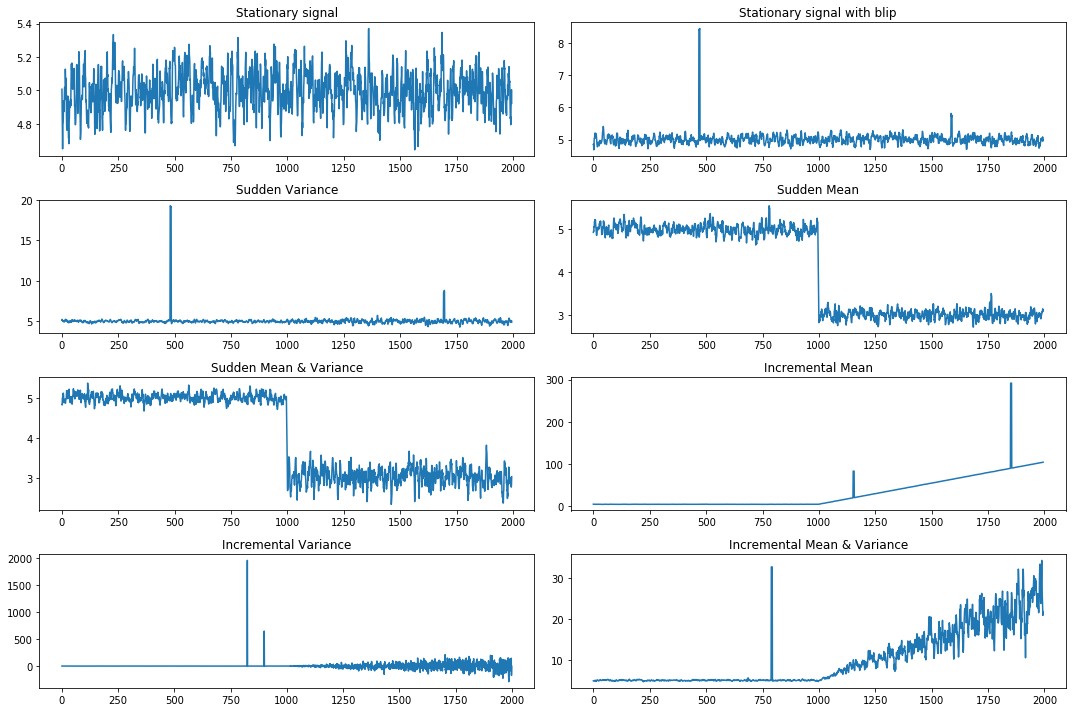

In [0]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=[15,10])

nrows = 4
ncols = 2

row = 0
col = 0

for key in signals.keys():
  
  if col >= ncols:
    col = 0
    row += 1
  
  ax[row][col].plot(signals[key])
  ax[row][col].set_title(key)
  
  col += 1
  
plt.tight_layout()


### Financial Datasets

In [0]:
from pyFTS.data import TAIEX, NASDAQ, SP500, DowJones, Ethereum, Bitcoin, EURGBP, EURUSD, GBPUSD
dji = DowJones.get_data('AVG')[1000:5000]
btc = Bitcoin.get_data('AVG')
eth = Ethereum.get_data('AVG')
eurusd = EURUSD.get_data()[:5000]
eurgbp = EURGBP.get_data()[:5000]
gbpusd = GBPUSD.get_data()[:5000]
taiex = TAIEX.get_data()[:4000]
sp500 = SP500.get_data()[10000:14000]
nasdaq = NASDAQ.get_data()[:4000]
financial = {
   "TAIEX": taiex,
   "SP500": sp500, 
   "NASDAQ": nasdaq, 
   "DowJones": dji,
   "BTC-USD": btc,
   "ETH-USD": eth,
   "EUR-USD": eurusd,
    "EUR-GBP": eurgbp,
   "GBP-USD": gbpusd
}

train_split = 600


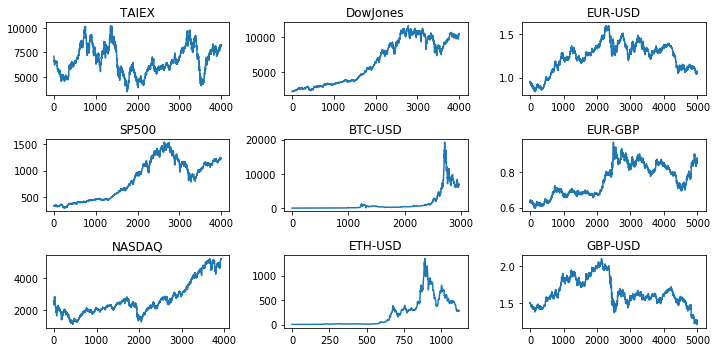

In [0]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=[10,5])
for count, ds in enumerate(financial.keys()):
    row = count % 3
    col = count // 3
    ax[row][col].plot(financial[ds])
    ax[row][col].set_title(ds)
      
plt.tight_layout()

In [0]:
datasets = {}
#for key in signals.keys():
#  datasets[key] = signals[key]
for key in financial.keys():
  datasets[key] = financial[key]

from pyFTS.common import Transformations

tdiff = Transformations.Differential(1)

boxcox = Transformations.BoxCox(0)

transformations = {'None': None } #, 'Differential(1)': tdiff, 'BoxCox(0)': boxcox }

### Statistics Tests

#### Stationarity

Augmented Dickey-Fuller test for unit root, $\alpha = 0.05$.

$H_0$: Time series have a unit root and it is non-stationary

$H_1$: Time series does not have a unit root and it is stationary

In [0]:


from statsmodels.tsa.stattools import adfuller

rows =[]

for count1, ds in enumerate(datasets.keys()):
    row = [ds]
    dataset = datasets[ds]
    result = adfuller(dataset)
    row.extend([result[0],result[1]])
    #row.extend([value for key, value in result[4].items()])
    row.append('H0 Accepted' if result[1] > 0.05 else 'H0 Rejected')
    rows.append(row)
    
pd.DataFrame(rows,columns=['Dataset','ADF Statistic','p-value','Result'])



,Dataset,ADF Statistic,p-value,Result
0,TAIEX,-2.491767,0.117490,H0 Accepted
1,SP500,-0.943446,0.773329,H0 Accepted
2,NASDAQ,0.476224,0.984132,H0 Accepted
3,DowJones,-0.800893,0.818860,H0 Accepted
4,BTC-USD,-1.206100,0.670966,H0 Accepted
5,ETH-USD,-1.852677,0.354640,H0 Accepted
6,EUR-USD,-1.845986,0.357882,H0 Accepted
7,EUR-GBP,-1.845986,0.357882,H0 Accepted
8,GBP-USD,-1.131750,0.702246,H0 Accepted


#### Homoskedasticity

Levene’s test checks for homogeneity of variances, $\alpha = 0.05$ 

$H_0$: The sub-samples variances of the time series are all equal.

$H_1$: At least one variance of the time series sub-samples is different.

In [0]:


from scipy.stats import levene

rows =[]

for count1, ds in enumerate(datasets.keys()):
    row = [ds]
    dataset = datasets[ds]
    split = int(len(dataset)/2)
    ds1, ds2 = dataset[:split], dataset[split:]
    result = levene(ds1,ds2)
    row.extend([result.statistic,result.pvalue])
    #row.extend([value for key, value in result[4].items()])
    row.append('H0 Accepted' if result.pvalue > 0.05 else 'H0 Rejected')
    rows.append(row)
    
pd.DataFrame(rows,columns=['Dataset','Levene Statistic','p-value','Result'])



,Dataset,Levene Statistic,p-value,Result
0,TAIEX,62.530885,3.366934e-15,H0 Rejected
1,SP500,64.954050,1.003282e-15,H0 Rejected
2,NASDAQ,1851.123985,0.000000e+00,H0 Rejected
3,DowJones,163.413938,1.053157e-36,H0 Rejected
4,BTC-USD,524.853179,4.352254e-107,H0 Rejected
5,ETH-USD,666.975156,9.700699e-116,H0 Rejected
6,EUR-USD,401.104689,6.851098e-86,H0 Rejected
7,EUR-GBP,401.104689,6.851098e-86,H0 Rejected
8,GBP-USD,1340.896808,2.812862e-260,H0 Rejected


## Benchmarks

### Grid Search - Time Variant & Incremental Ensemble

In [0]:
from pyFTS.models.incremental import TimeVariant, IncrementalEnsemble
from pyFTS.partitioners import Grid
from pyFTS.models import hofts,pwfts
from pyFTS.benchmarks import Measures

rows = []

for row, key in enumerate(datasets.keys()):
  for window in [50,100,200]:
    for batch in [10, 20, 30, 40, 50]:
      num_models=2
      l = len(datasets[key])
      train = datasets[key][:l//10]
      test = datasets[key][l//10:]

      model1 = TimeVariant.Retrainer(partitioner_method=Grid.GridPartitioner, partitioner_params={'npart': 35},
                              fts_method=pwfts.ProbabilisticWeightedFTS, fts_params={}, order=1 ,
                              batch_size=batch, window_length=window*num_models)
      
      model1.fit(train)

      rmse, mape, u = Measures.get_point_statistics(test, model1)
      data = [key, 'TimeVariant', window, batch, None, rmse, mape, u]
      rows.append(data)

      for num_models in [2,3,4]:
    
        model2 = IncrementalEnsemble.IncrementalEnsembleFTS(partitioner_method=Grid.GridPartitioner, partitioner_params={'npart': 35},
                                        fts_method=pwfts.ProbabilisticWeightedFTS, fts_params={}, order=1 ,
                                        batch_size=int(batch/3), window_length=window, num_models=num_models)
        
        model2.fit(train)

        rmse, mape, u = Measures.get_point_statistics(test, model2)
        data = [key, 'IncrementalEnsemble', window, batch, num_models, rmse, mape, u]
        rows.append(data)

print(pd.DataFrame(rows,columns=["Dataset","Model","Window","Batch","Models","RMSE","MAPE","U"]).sort_values(by=["Dataset", "U","MAPE","RMSE"]))




     Dataset                Model  Window  Batch  Models     RMSE   MAPE      U
260  BTC-USD          TimeVariant     100     10     NaN   465.72   4.97   2.96
240  BTC-USD          TimeVariant      50     10     NaN   486.61   7.15   3.15
280  BTC-USD          TimeVariant     200     10     NaN   524.00   5.01   3.19
264  BTC-USD          TimeVariant     100     20     NaN   696.71   6.92   4.42
244  BTC-USD          TimeVariant      50     20     NaN   724.79  11.10   4.69
..       ...                  ...     ...    ...     ...      ...    ...    ...
41     TAIEX  IncrementalEnsemble     200     10     2.0  1597.87  14.24  16.63
51     TAIEX  IncrementalEnsemble     200     30     4.0  1599.89  14.48  16.65
50     TAIEX  IncrementalEnsemble     200     30     3.0  1601.91  14.49  16.67
57     TAIEX  IncrementalEnsemble     200     50     2.0  1602.90  14.48  16.68
49     TAIEX  IncrementalEnsemble     200     30     2.0  1605.30  14.49  16.71

[540 rows x 8 columns]


In [0]:
from google.colab import files

uploaded = files.upload()

Saving nsfts.db to nsfts (1).db


In [0]:
!ls

BTCUSD.csv    EURGBP.csv  NASDAQ.csv.bz2  nsfts.db-wal	 TAIEX.csv.bz2
DowJones.csv  EURUSD.csv  nsfts.db	  sample_data
ETHUSD.csv    GBPUSD.csv  nsfts.db-shm	  SP500.csv.bz2


In [0]:
import sqlite3 

con = sqlite3.connect("nsfts.db")
sql = "SELECT * from hyperparam"
df = pd.read_sql_query(sql, con)
df.head()

,ID,Date,Dataset,Tag,Model,Transformation,mf,Order,Partitioner,Partitions,alpha,lags,Measure,Value
0,1,2020-01-09 11:46:45,rmse,GridSearch,TimeVariant,50,10,1,None,None,None,None,rmse,0.07
1,2,2020-01-09 11:46:45,mape,GridSearch,TimeVariant,50,10,1,None,None,None,None,mape,1.16
2,3,2020-01-09 11:46:45,u,GridSearch,TimeVariant,50,10,1,None,None,None,None,u,0.98
3,4,2020-01-09 11:46:55,rmse,GridSearch,IncrementalEnsemble,50,3,2,None,None,None,None,rmse,0.07
4,5,2020-01-09 11:46:55,mape,GridSearch,IncrementalEnsemble,50,3,2,None,None,None,None,mape,1.19


### Accuracy Degradation of FTS time-invariant models

,Dataset,Model,RMSE,MAPE,U
1,Stationary,PWFTS,0.01,0.24,1.10
0,Stationary,WHOFTS,0.02,0.24,1.12
2,Stationary,NSFTS,0.02,0.25,1.15
8,Sudden Variance,NSFTS,0.02,0.27,1.19
23,Blip + Sudden Mean & Variance,NSFTS,0.18,1.52,1.24
29,Incremental Variance,NSFTS,2.11,94.13,1.26
35,Blip + Incremental Variance,NSFTS,2.00,130.27,1.33
12,Blip + Sudden Variance,WHOFTS,0.02,0.30,1.34
7,Sudden Variance,PWFTS,0.02,0.29,1.36
6,Sudden Variance,WHOFTS,0.02,0.31,1.41


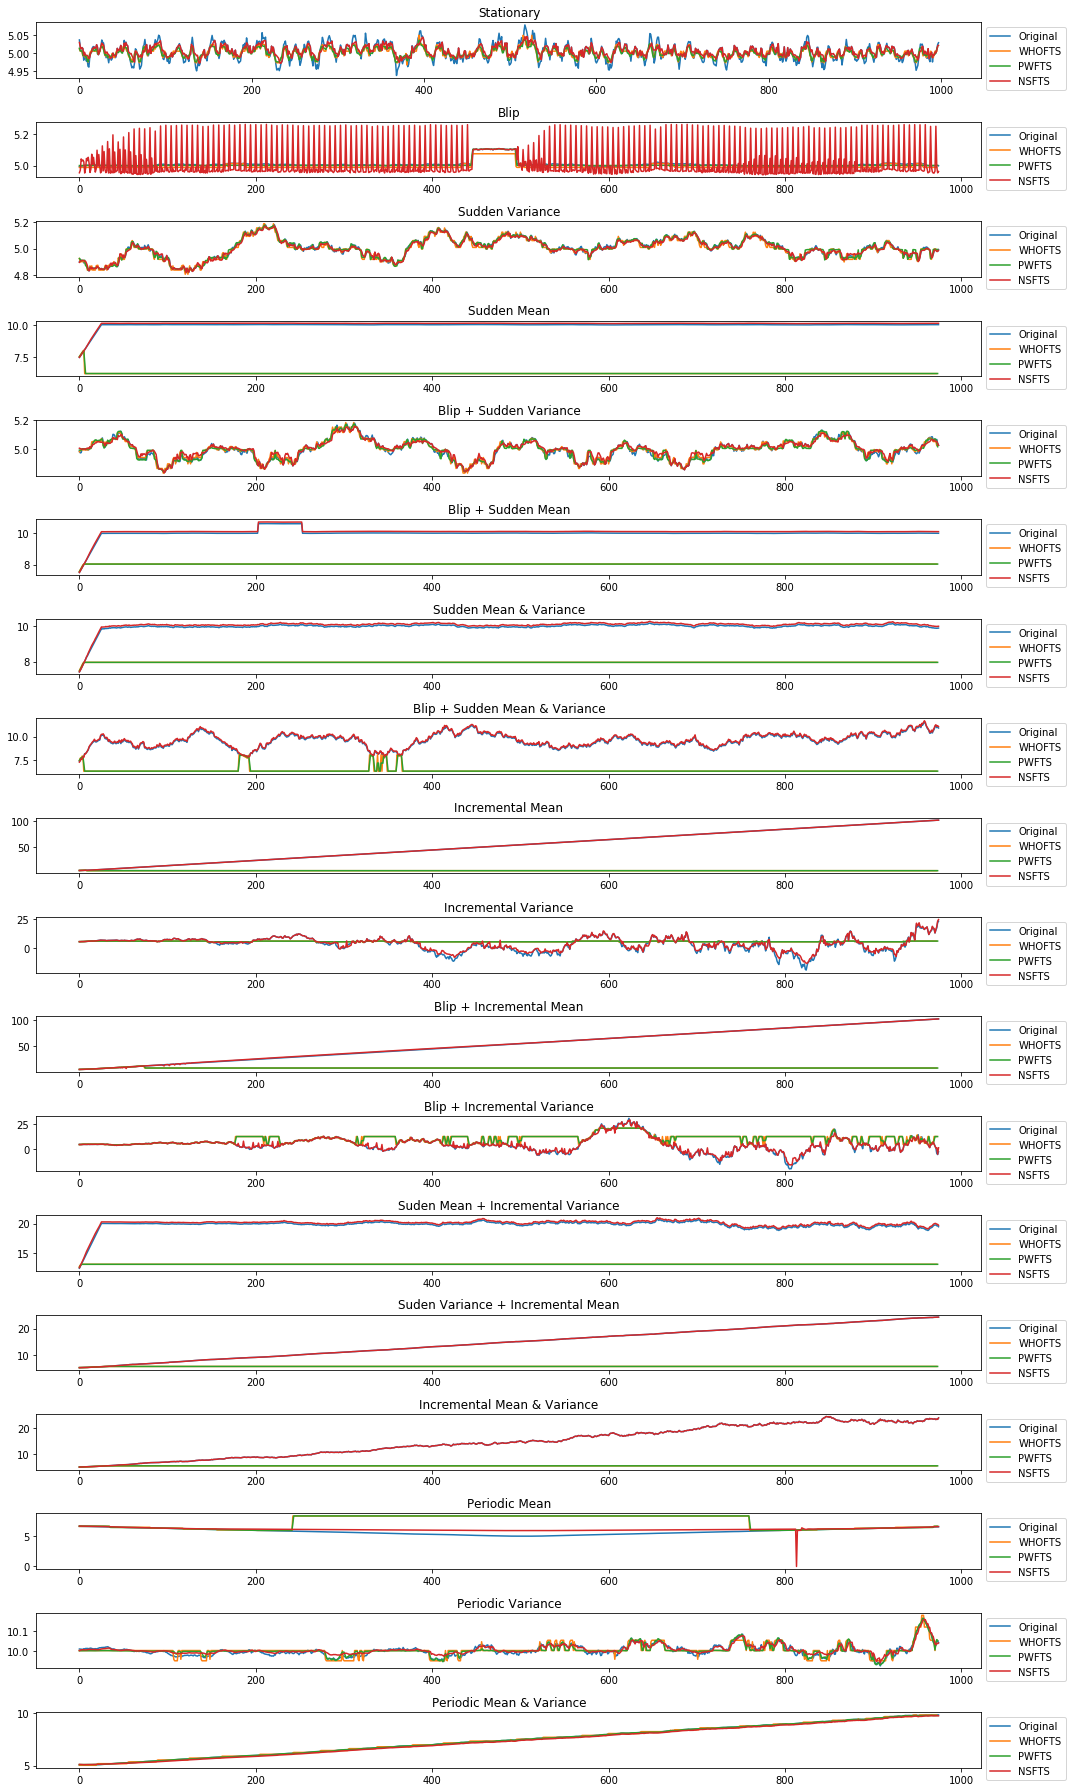

In [0]:
from pyFTS.models import hofts, pwfts, cheng
from pyFTS.partitioners import Grid
from pyFTS.models.nonstationary import common, perturbation, partitioners as nspart
from pyFTS.models.nonstationary import nsfts, util as nsUtil
from pyFTS.benchmarks import Measures

fig, ax = plt.subplots(nrows=18, ncols=1, figsize=[15,25])

rows = []

for row, key in enumerate(signals.keys()):
  dataset = signals[key]
  l = len(dataset)
  train = dataset[:l//2]
  test = dataset[l//2:]

  ax[row].plot(test, label="Original")
  ax[row].set_title(key)

  partitioner = Grid.GridPartitioner(data=train, npart=35)

  for method in [hofts.WeightedHighOrderFTS, pwfts.ProbabilisticWeightedFTS]:
    model = method(partitioner=partitioner, order=2)
    model.fit(train)
    forecasts = model.predict(test)

    ax[row].plot(forecasts, label=model.shortname)

    rmse, mape, u = Measures.get_point_statistics(test, model)
    data = [key, model.shortname, rmse, mape, u]
    rows.append(data)


  nsfs = nspart.simplenonstationary_gridpartitioner_builder(data=train, npart=35, transformation=None)
  model = nsfts.NonStationaryFTS(partitioner=nsfs, order=2)
  model.fit(train)
  forecasts = model.predict(test)
  ax[row].plot(forecasts, label=model.shortname)

  rmse, mape, u = Measures.get_point_statistics(test, model)
  data = [key, model.shortname, rmse, mape, u]
  rows.append(data)

  handles, labels = ax[row].get_legend_handles_labels()
  lgd = ax[row].legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))

plt.tight_layout()

pd.DataFrame(rows,columns=["Dataset","Model","RMSE","MAPE","U"]).sort_values(by=["U","MAPE","RMSE"])


### Time Variant Models

In [0]:
def mda(targets, forecasts):
  return sum([1 if (targets[t] - target[t-1])*(forecasts[t] - targets[t-1])  > 0 else 0 for t in range(0,l-1)])/l

In [0]:
from pyFTS.benchmarks import naive
from pyFTS.models.incremental import TimeVariant, IncrementalEnsemble
from pyFTS.models.nonstationary import common, perturbation, partitioners as nspart
from pyFTS.models.nonstationary import nsfts, util as nsUtil
from pyFTS.partitioners import Grid
from pyFTS.models import hofts, pwfts
from pyFTS.benchmarks import Measures
from pyFTS.common import Transformations, Util as cUtil

from pyFTS.benchmarks import Util as bUtil

window = 100
batch = 10
num_models = 2

rows = []

conn = bUtil.open_benchmark_db("nsfts.db")

for row, key in enumerate(datasets.keys()):
  l = len(datasets[key])
  train = datasets[key][:l//10]
  test = datasets[key][l//10:]

  model1 = TimeVariant.Retrainer(partitioner_method=Grid.GridPartitioner, partitioner_params={'npart': 35},
                              fts_method=pwfts.ProbabilisticWeightedFTS, fts_params={}, order=1 ,
                              batch_size=batch, window_length=window*num_models)

  model2 = IncrementalEnsemble.IncrementalEnsembleFTS(partitioner_method=Grid.GridPartitioner, partitioner_params={'npart': 35},
                                fts_method=pwfts.ProbabilisticWeightedFTS, fts_params={}, order=1 ,
                                batch_size=int(batch/num_models), window_length=window, num_models=num_models)

  nsfs = nspart.simplenonstationary_gridpartitioner_builder(data=train, npart=35, transformation=None)
  model3 = nsfts.WeightedNonStationaryFTS(partitioner=nsfs)
  
  for model in [model1, model2, model3]:
    model.fit(train)
    #forecasts = model.predict(test)
    rmse,mape,u = Measures.get_point_statistics(test, model)
    row = [key, model.shortname, rmse, mape, u]
    rows.append(row)

    m = {'rmse': rmse, 'mape': mape, 'u': u}

    for k, v in m.items():
      data = (key, 'benchmarks', 'point', model.shortname, None, 1, 'Grid', 35, len(model), 1, None, k, v)

      bUtil.insert_benchmark(data, conn)

resultados = pd.DataFrame(rows,columns=["Dataset","Model","RMSE", "MAPE", "U"])

In [0]:
from google.colab import files
files.download("nsfts.db")

### Overall Ranking

#### RMSE

In [0]:
rows = []
models = resultados.Model.unique()
for ds in datasets.keys():
  row = [ds]
  for model in models:
    value = resultados[(resultados['Dataset']==ds) & (resultados['Model']==model)]['RMSE'].values[0]
    row.append(value)
  rows.append(row)

columns = models.tolist()
columns.insert(0,"Dataset")

experiments = pd.DataFrame(rows, columns=columns)

experiments

,Dataset,TimeVariant - PWFTS,IncrementalEnsembleFTS,WNSFTS
0,EUR-GBP,0.0,0.01,0.0


In [0]:
print(experiments.to_latex())

\begin{tabular}{llrrr}
\toprule
{} &                      Dataset &  TimeVariant - PWFTS &  IncrementalEnsembleFTS &  WNSFTS \\
\midrule
0  &            Stationary signal &                 0.07 &                    0.07 &    0.07 \\
1  &  Stationary signal with blip &                 0.16 &                    0.17 &    0.14 \\
2  &              Sudden Variance &                 0.12 &                    0.12 &    0.12 \\
3  &                  Sudden Mean &                 0.25 &                    0.55 &    0.79 \\
4  &       Sudden Mean \& Variance &                 0.59 &                    0.89 &    0.89 \\
5  &             Incremental Mean &                 0.39 &                    7.81 &    0.11 \\
6  &         Incremental Variance &                51.89 &                   50.51 &   60.59 \\
7  &  Incremental Mean \& Variance &                 1.29 &                    2.37 &    1.65 \\
8  &                        TAIEX &               145.82 &                 1130.86 &  116.82 

#### MAPE

In [0]:
rows = []
models = resultados.Model.unique()
for ds in datasets.keys():
  row = [ds]
  for model in models:
    value = resultados[(resultados['Dataset']==ds) & (resultados['Model']==model)]['MAPE'].values[0]
    row.append(value)
  rows.append(row)

columns = models.tolist()
columns.insert(0,"Dataset")

experiments = pd.DataFrame(rows, columns=columns)

experiments

,Dataset,TimeVariant - PWFTS,IncrementalEnsembleFTS,WNSFTS
0,EUR-GBP,0.37,0.48,0.32


In [0]:
print(experiments.to_latex())

\begin{tabular}{llrrr}
\toprule
{} &                      Dataset &  TimeVariant - PWFTS &  IncrementalEnsembleFTS &  WNSFTS \\
\midrule
0  &            Stationary signal &                 1.13 &                    1.16 &    1.13 \\
1  &  Stationary signal with blip &                 1.29 &                    1.27 &    1.22 \\
2  &              Sudden Variance &                 1.80 &                    1.81 &    1.73 \\
3  &                  Sudden Mean &                 2.20 &                    6.00 &   19.89 \\
4  &       Sudden Mean \& Variance &                 3.82 &                    7.52 &   19.58 \\
5  &             Incremental Mean &                 1.02 &                   14.92 &    0.69 \\
6  &         Incremental Variance &               151.43 &                  149.56 &  241.69 \\
7  &  Incremental Mean \& Variance &                 5.06 &                    8.48 &    5.44 \\
8  &                        TAIEX &                 1.27 &                    9.60 &    1.34 

#### U

In [0]:
rows = []
models = resultados.Model.unique()
for ds in datasets.keys():
  row = [ds]
  for model in models:
    value = resultados[(resultados['Dataset']==ds) & (resultados['Model']==model)]['U'].values[0]
    row.append(value)
  rows.append(row)

columns = models.tolist()
columns.insert(0,"Dataset")

experiments = pd.DataFrame(rows, columns=columns)

experiments

,Dataset,TimeVariant - PWFTS,IncrementalEnsembleFTS,WNSFTS
0,EUR-GBP,1.24,3.61,1.08


In [0]:
print(experiments.to_latex())

\begin{tabular}{llrrr}
\toprule
{} &                      Dataset &  TimeVariant - PWFTS &  IncrementalEnsembleFTS &  WNSFTS \\
\midrule
0  &            Stationary signal &                 0.99 &                    1.01 &    1.01 \\
1  &  Stationary signal with blip &                 1.14 &                    1.24 &    1.00 \\
2  &              Sudden Variance &                 0.98 &                    1.00 &    0.98 \\
3  &                  Sudden Mean &                 1.72 &                    3.85 &    5.66 \\
4  &       Sudden Mean \& Variance &                 1.22 &                    1.90 &    1.96 \\
5  &             Incremental Mean &                 3.45 &                   71.08 &    1.04 \\
6  &         Incremental Variance &                 0.78 &                    0.78 &    0.96 \\
7  &  Incremental Mean \& Variance &                 1.03 &                    1.51 &    1.09 \\
8  &                        TAIEX &                 1.52 &                   11.90 &    1.24 

### Plots

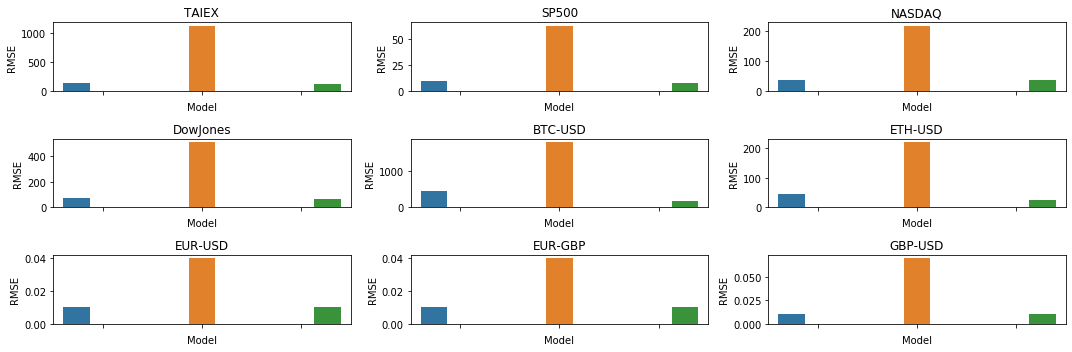

In [0]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=[15,5])

for count, ds in enumerate(datasets.keys()):
  row = count // 3
  col = count % 3
  ax[row][col].set_title(ds)
  df = resultados[(resultados["Dataset"]==ds)]
  g = sns.barplot(x="Model",y="RMSE", hue='Model', data=df, ax=ax[row][col]) #, type='bar')
  locs = ax[row][col].get_xticks()
  labels = ax[row][col].get_xticklabels()
  ax[row][col].set_xticks(locs)
  ax[row][col].set_xticklabels([])
  g.get_legend().remove()

plt.tight_layout()

## Statistical Tests

In [0]:
!git clone https://github.com/petroniocandido/stac

Cloning into 'stac'...
remote: Enumerating objects: 2238, done.
remote: Total 2238 (delta 0), reused 0 (delta 0), pack-reused 2238
Receiving objects: 100% (2238/2238), 23.62 MiB | 32.08 MiB/s, done.
Resolving deltas: 100% (1147/1147), done.


### Experiment table

In [0]:
def experiment_table(results):
  models = results.Model.unique()
  datasets = results.Dataset.unique()
  rows = []
  for ds in datasets:
    row = [ds]
    for model in models:
      value = results[(results['Dataset']==ds) & (results['Model']==model)][str(H)+'AVG'].values[0]
      row.append(value)
    rows.append(row)

  columns = models.tolist()
  columns.insert(0,"Dataset")

  return pd.DataFrame(rows, columns=columns)

### Test for the equality of the means


Friedman Aligned Ranks test with $\alpha = 0.05$.

$H_0$: There's no significant difference between the means

$H_1$: There is at least one significant difference between the means

In [0]:
from pyFTS.benchmarks import Tests

ranks,post_hoc = Tests.test_mean_equality(experiments)

ranks

F-Value: 13.199413687367318 	p-Value: 0.001360766896491783

H0 is rejected!



,METHOD,RANK
2,WNSFTS,19.500000
0,TimeVariant - PWFTS,20.235294
1,IncrementalEnsembleFTS,38.264706


In [0]:
print(ranks.to_latex())

\begin{tabular}{llr}
\toprule
{} &                  METHOD &       RANK \\
\midrule
2 &                  WNSFTS &  19.500000 \\
0 &     TimeVariant - PWFTS &  20.235294 \\
1 &  IncrementalEnsembleFTS &  38.264706 \\
\bottomrule
\end{tabular}



#### Post-hoc test for method equivalence

Finner paired post-hoc test with NSFTS as control method.

$H_0$: There is no significant difference between the means

$H_1$: There is a significant difference between the means

In [0]:
ph_result = Tests.post_hoc_tests(post_hoc,'WNSFTS')
ph_result

,COMPARISON,Z-VALUE,P-VALUE,ADJUSTED P-VALUE,Result
0,WNSFTS vs IncrementalEnsembleFTS,3.680062,0.000233,0.000466,H0 Rejected
1,WNSFTS vs TimeVariant - PWFTS,0.144203,0.885340,0.885340,H0 Accepted


In [0]:
print(ph_result.to_latex())

\begin{tabular}{llrrrl}
\toprule
{} &                        COMPARISON &   Z-VALUE &   P-VALUE &  ADJUSTED P-VALUE &       Result \\
\midrule
0 &  WNSFTS vs IncrementalEnsembleFTS &  3.680062 &  0.000233 &          0.000466 &  H0 Rejected \\
1 &     WNSFTS vs TimeVariant - PWFTS &  0.144203 &  0.885340 &          0.885340 &  H0 Accepted \\
\bottomrule
\end{tabular}



## NSFTS Method Snapshots

In [0]:
partitions = {'BTC-USD': {'BoxCox(0)': 34, 'Differential(1)': 6, 'None': 10},
 'CMIV': {'BoxCox(0)': 37, 'Differential(1)': 12, 'None': 17},
 'DowJones': {'BoxCox(0)': 38, 'Differential(1)': 15, 'None': 36},
 'ETH-USD': {'BoxCox(0)': 13, 'Differential(1)': 39, 'None': 12},
 'EUR-GBP': {'BoxCox(0)': 29, 'Differential(1)': 11, 'None': 35},
 'EUR-USD': {'BoxCox(0)': 29, 'Differential(1)': 11, 'None': 35},
 'GBP-USD': {'BoxCox(0)': 33, 'Differential(1)': 3, 'None': 37},
 'IMCV': {'BoxCox(0)': 36, 'Differential(1)': 32, 'None': 36},
 'IMIV': {'BoxCox(0)': 39, 'Differential(1)': 14, 'None': 6},
 'IMIV0': {'BoxCox(0)': 39, 'Differential(1)': 16, 'None': 3},
 'NASDAQ': {'BoxCox(0)': 39, 'Differential(1)': 15, 'None': 36},
 'SP500': {'BoxCox(0)': 33, 'Differential(1)': 7, 'None': 33},
 'TAIEX': {'BoxCox(0)': 39, 'Differential(1)': 31, 'None': 33}}

In [0]:
from pyFTS.benchmarks import Util as bUtil
from pyFTS.models.nonstationary import partitioners as nspart, nsfts, util as nsUtil

fig, ax = plt.subplots(nrows=len(datasets.keys()), ncols=len(transformations.keys()), figsize=[15,15])

for count1, ds in enumerate(datasets.keys()):
  data = datasets[ds]
  train = data[:train_split]
  test = data[train_split:]
  for count2, tf in enumerate(transformations.keys()):
    transformation = transformations[tf]
    
    fs = nspart.simplenonstationary_gridpartitioner_builder(data=train, npart=partitions[ds][tf], transformation=transformation)
    
    model = nsfts.NonStationaryFTS(partitioner=fs)
    model.fit(train)
    forecasts = model.predict(test)
    
    ax[count1][count2].plot(test, label='Original')
    ax[count1][count2].plot(forecasts, label='Forecasted')
    
    ax[count1][count2].set_title(ds + " " + tf)
    
    #handles, labels = ax[ct].get_legend_handles_labels()
    #lgd = ax[ct].legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))
    

plt.tight_layout()
    

In [0]:
from pyFTS.models.nonstationary import partitioners as nspart, nsfts, util as nsUtil
from pyFTS.benchmarks import benchmarks as bcmk
from pyFTS.partitioners import Grid

def model_details(ds, tf, train_split, test_split):
  data = datasets[ds]
  train = data[:train_split]
  test = data[train_split:test_split]
  transformation = transformations[tf]
  fs = nspart.simplenonstationary_gridpartitioner_builder(data=train, npart=partitions[ds][tf], transformation=transformation)
  model = nsfts.NonStationaryFTS(partitioner=fs)
  model.fit(train)
  print(model)
  forecasts = model.predict(test)
  residuals = np.array(test[1:]) - np.array(forecasts[:-1])

  fig, axes = plt.subplots(nrows=2, ncols=1, figsize=[15,10])

  axes[0].plot(test[1:], label="Original")
  axes[0].plot(forecasts[:-1], label="Forecasts")

  axes[1].set_title("Residuals")
  axes[1].plot(residuals)
  handles0, labels0 = axes[0].get_legend_handles_labels()
  lgd = axes[0].legend(handles0, labels0, loc=2)
  
  nsUtil.plot_sets_conditional(model, test,  step=10, size=[12,5])
  
  
from pyFTS.models.nonstationary import partitioners as nspart, nsfts, util as nsUtil

def all_model(ds, tf, train_split, test_split):
  data = datasets[ds]
  train = data[:train_split]
  test = data[train_split:test_split]
  
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,7])
  ax.plot(test[1:], label="Original")
  
  transformation = transformations[tf]
  #ns_fs = nspart.simplenonstationary_gridpartitioner_builder(data=train, npart=partitions[ds][tf], transformation=transformation)
  #model = nsfts.NonStationaryFTS(partitioner=ns_fs)
  #model.fit(train)
  
  #forecasts = model.predict(test)
  #ax.plot(forecasts[:-1], label="NSFS")
  
  fs = Grid.GridPartitioner(data=train, npart=partitions[ds][tf], transformation=transformation)
  
  for method in bcmk.get_point_methods():
    model = method(partitioner=fs)
    if 'PWFTS' in model.shortname:
      continue
      
    if not model.is_high_order:
      model.fit(train)
      forecasts = model.predict(test)
      ax.plot(forecasts[:-1], label=model.shortname)
    else:
      for order in [2,3]:
        model = method(partitioner=fs, order=order)
        model.fit(train)
        forecasts = model.predict(test)
        for k in range(order):
          forecasts.insert(0,None)
        ax.plot(forecasts[:-1], label=model.shortname + " " + str(order))
        

  handles0, labels0 = ax.get_legend_handles_labels()
  lgd = ax.legend(handles0, labels0, loc=2, bbox_to_anchor=(1, 1))
  


Non Stationary FTS:
A7 -> A7,A8,A9
A8 -> A10,A7,A8,A9
A9 -> A10,A11,A7,A8,A9
A10 -> A10,A11,A12,A8,A9
A11 -> A10,A11,A12,A13,A9
A12 -> A10,A11,A12,A13,A14,A15,A9
A13 -> A12,A13,A14,A15
A14 -> A12,A13,A14,A15,A16
A15 -> A13,A14,A15,A16,A17
A16 -> A15,A16,A17,A18
A17 -> A15,A16,A17,A18,A19
A18 -> A16,A17,A18,A19,A20
A19 -> A18,A19,A20,A21,A22
A20 -> A19,A20,A21,A22,A23
A21 -> A19,A20,A21,A22,A23
A22 -> A19,A20,A21,A22,A23,A24
A23 -> A19,A20,A21,A22,A23,A24,A25
A24 -> A22,A23,A24,A25,A26
A25 -> A22,A23,A24,A25,A26,A27
A26 -> A22,A23,A24,A25,A26,A27
A27 -> A25,A26,A27



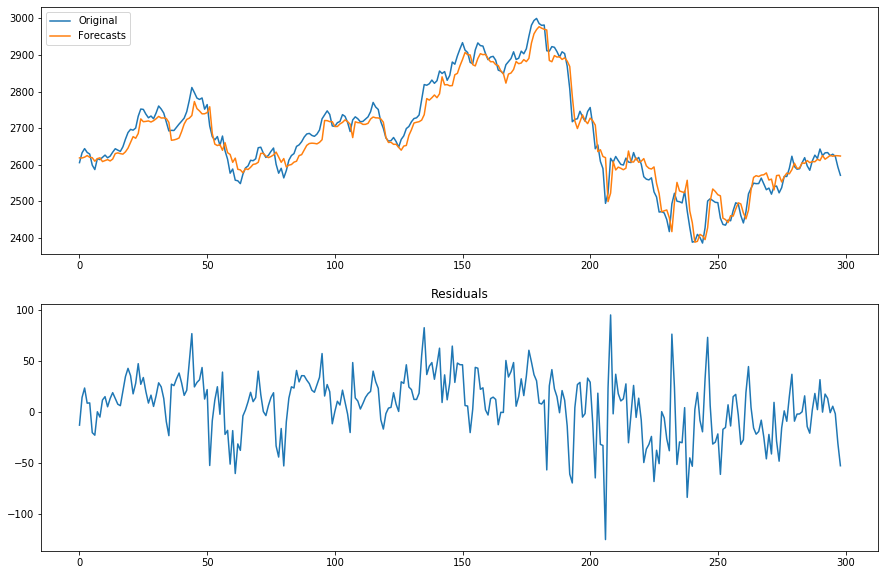

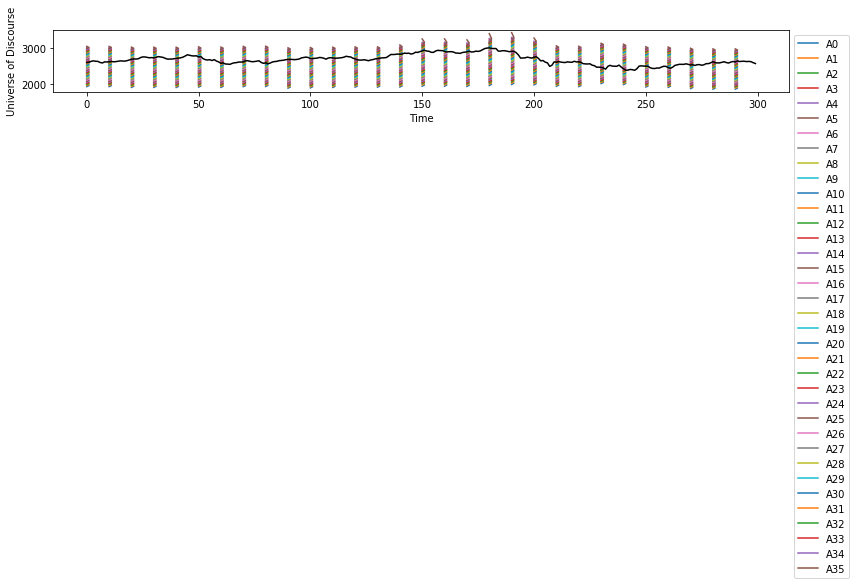

In [0]:
model_details('DowJones','None',200,500)

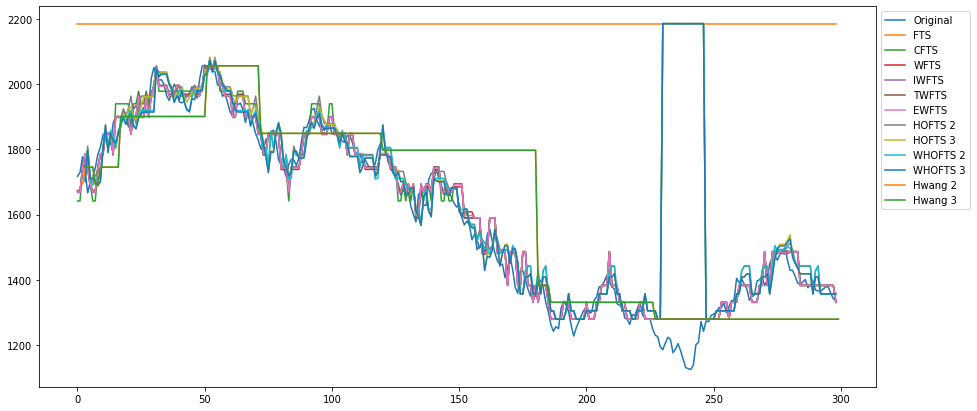

In [0]:
all_model('NASDAQ','None',200,500)